In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # para leer datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import sklearn.neural_network
from sklearn.utils.multiclass import unique_labels

In [13]:
# Carga datos
data = pd.read_csv( 'data_Sha_64.txt' , delimiter=',' )
#data.head()

data.keys()
X = data[data.keys()[1:]] # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = data[data.keys()[0]]
print(np.shape(X), np.shape(Y))

(1599, 64) (1599,)


In [14]:
species = np.array(Y.copy())
species = np.unique(species)

target = []
for i in range(len(Y)):
    for j in range(len(species)):
        if Y[i] == species[j]:
            target.append( j )

In [15]:
# Vamos a hacer un split training test
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split( X, target, train_size=0.5 )

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
N = np.shape(X_train)[0]
max_iteration = 7000

In [24]:
loss_array = []
f1_array = []
f1_test_array = []
for i in range(10):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                                hidden_layer_sizes=(4,4,4), 
                                                max_iter=max_iteration )
    x_tr=X_train[:round(N*(i+1)/10)]
    y_tr=Y_train[:round(N*(i+1)/10)]
    mlp.fit(x_tr, y_tr)
    loss_array.append( mlp.loss_ )
    f1_array.append( sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro') )

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


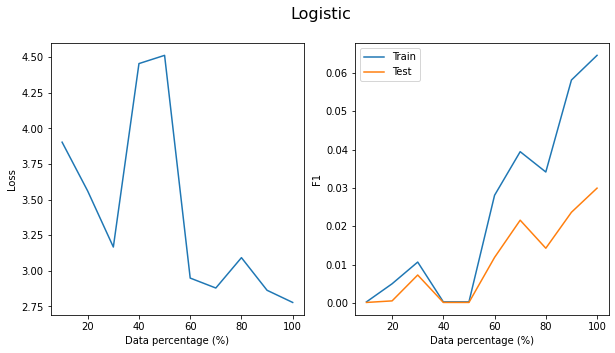

In [25]:
percent_array = 10*np.arange( 1, 10+1, 1)

plt.figure(figsize=(10,5))
plt.suptitle('Logistic', fontsize=16)

plt.subplot(1,2,1)
plt.plot(percent_array, loss_array )
plt.ylabel("Loss")
plt.xlabel( 'Data percentage (%)' )

plt.subplot(1,2,2)
plt.plot(percent_array, f1_array , label= 'Train' )
plt.plot(percent_array, f1_test_array , label= 'Test' )
plt.ylabel("F1")
plt.xlabel( 'Data percentage (%)' )
plt.legend( )

plt.subplots_adjust(hspace=.5)
plt.savefig( 'loss_f1_logistic.png' )
plt.show()

In [19]:
max_iteration = 5000

loss_array = []
f1_array = []
f1_test_array = []
for i in range(10):
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',
                                                hidden_layer_sizes=(4,4,4), 
                                                max_iter=max_iteration )
    x_tr=X_train[:round(N*(i+1)/10)]
    y_tr=Y_train[:round(N*(i+1)/10)]
    mlp.fit(x_tr, y_tr)
    loss_array.append( mlp.loss_ )
    f1_array.append( sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro') )

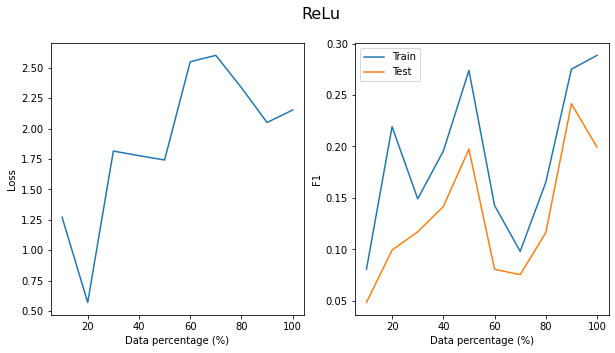

In [20]:
percent_array = 10*np.arange( 1, 10+1, 1)

plt.figure(figsize=(10,5))
plt.suptitle('ReLu', fontsize=16)

plt.subplot(1,2,1)
plt.plot(percent_array, loss_array )
plt.ylabel("Loss")
plt.xlabel( 'Data percentage (%)' )

plt.subplot(1,2,2)
plt.plot(percent_array, f1_array , label= 'Train' )
plt.plot(percent_array, f1_test_array , label= 'Test' )
plt.ylabel("F1")
plt.xlabel( 'Data percentage (%)' )
plt.legend( )

plt.subplots_adjust(hspace=.5)
plt.savefig( 'loss_f1_relu.png' )
plt.show()

In [21]:
alpha_array = np.logspace( -6, 2, 18 )
loss_array = []
f1_array = []
f1_test_array = []
for a in alpha_array:
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',
                                                hidden_layer_sizes=(4,4,4), 
                                                max_iter=max_iteration, alpha = a )
    mlp.fit(X_train, Y_train)
    loss_array.append( mlp.loss_ )
    f1_array.append( sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro') )

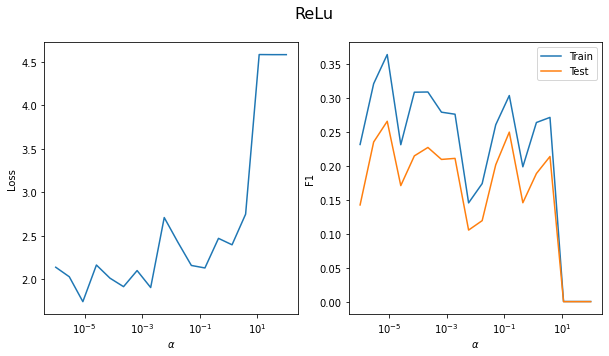

In [22]:
plt.figure(figsize=(10,5))
plt.suptitle('ReLu', fontsize=16)

plt.subplot(1,2,1)
plt.plot(alpha_array, loss_array )
plt.ylabel("Loss")
plt.xlabel( '$\\alpha$' )
plt.xscale( "log" )

plt.subplot(1,2,2)
plt.plot(alpha_array, f1_array , label= 'Train' )
plt.plot(alpha_array, f1_test_array , label= 'Test' )
plt.ylabel("F1")
plt.xlabel( '$\\alpha$' )
plt.xscale( "log" )
plt.legend( )

plt.subplots_adjust(hspace=.5)
plt.savefig( 'loss_f1_relu_alpha.png' )
plt.show()

## Para el dataset seleccionado, cuando la función de activación es la función logística se observa que el valor de F1 depende del número de intancias, siendo mejor cuando se aumenta esta catidad. Sin embargo, este aumento en el valor de F1 no es significativo, ya que el valor sigue siendo muy pequeño.

## Cuando se considera la función de activación "ReLu", la red da mejores resultados que los que se obtuvieron con